# Border Crossing Data Analysis

______________________________________________________________________________________________________________

## Data Cleaning

In [169]:
%matplotlib inline

# Import dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


import hvplot.pandas
import requests
import json
from pprint import pprint

# Import API key
from api_key import geoapify_key

# Import dependency and set theme for visualizations
import seaborn as sns
color_theme = sns.set_palette("muted")
sns.set(rc={'axes.facecolor': 'gainsboro', 'figure.facecolor':'whitesmoke'})

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Store file path
csv_path="Resources/Border_Crossing_Entry_Data.csv"

# Read the csv file
data_df = pd.read_csv(csv_path)

# Display the dataset
data_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [170]:
# List the colums in the dataset
data_df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Location'],
      dtype='object')

In [171]:
# Reduce the dataset to the columns needed for analysis
reduced_df = data_df[['Port Name','State', 'Border', 'Date', 'Measure', 'Value', 'Location']]

# Display the new dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location
0,Calexico East,California,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [172]:
# Check the datatypes for all columns in the dataset
reduced_df.dtypes

Port Name    object
State        object
Border       object
Date         object
Measure      object
Value         int64
Location     object
dtype: object

In [173]:
# Change the datatype for "Date" column to datetime and check the datatypes again to confirm the conversion
reduced_df['Date'] = pd.to_datetime(reduced_df['Date'])
reduced_df.dtypes

Port Name            object
State                object
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Location             object
dtype: object

In [174]:
# Split the "Date" column to retrieve Year, Month and Day
reduced_df['Year']= reduced_df['Date'].dt.year
reduced_df['Month']= reduced_df['Date'].dt.month
reduced_df['Day']= reduced_df['Date'].dt.day

# Displayt the dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1


In [175]:
# Split the Location column to get Latitude and Longitude values
reduced_df[['Point', 'Longitude', 'Latitude']] = reduced_df['Location'].str.split(" ", expand = True)

# Display the dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day,Point,Longitude,Latitude
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1,POINT,(-115.48433000000001,32.67524)
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1,POINT,(-67.94271,47.16207)
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1,POINT,(-117.05333,32.57333)
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1,POINT,(-110.93361,31.340279999999996)
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1,POINT,(-73.44253,44.990010000000005)


In [176]:
# Remove the symbols from Latitude and Longitude columns which are enot required:
reduced_df['Longitude'] = reduced_df['Longitude'].str.replace('(', '')
reduced_df['Latitude'] = reduced_df['Latitude'].str.replace(')', '')

# Display the dataset
reduced_df.head()

,Port Name,State,Border,Date,Measure,Value,Location,Year,Month,Day,Point,Longitude,Latitude
0,Calexico East,California,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,1,POINT,-115.48433000000001,32.67524
1,Van Buren,Maine,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,1,POINT,-67.94271,47.16207
2,Otay Mesa,California,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,1,POINT,-117.05333,32.57333
3,Nogales,Arizona,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,1,POINT,-110.93361,31.340279999999996
4,Trout River,New York,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,1,POINT,-73.44253,44.990010000000005


In [177]:
# Convert the columns Latitude and Longitude to float type to help with graphing
reduced_df[["Latitude", "Longitude"]] = reduced_df[["Latitude", "Longitude"]].apply(pd.to_numeric)

In [178]:
# Confirm data types for the dataset
reduced_df.dtypes

Port Name            object
State                object
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Location             object
Year                  int64
Month                 int64
Day                   int64
Point                object
Longitude           float64
Latitude            float64
dtype: object

In [179]:
# Reduce the dataset to the columns needed
reduced_df = reduced_df[['Year', 'Month', 
                         'Border', 'Port Name', 'State', 
                         'Measure', 'Value', 
                         'Longitude', 'Latitude']]

# Display the dataset
reduced_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2019,3,US-Mexico Border,Calexico East,California,Trucks,34447,-115.48433,32.67524
1,2019,3,US-Canada Border,Van Buren,Maine,Rail Containers Full,428,-67.94271,47.16207
2,2019,3,US-Mexico Border,Otay Mesa,California,Trucks,81217,-117.05333,32.57333
3,2019,3,US-Mexico Border,Nogales,Arizona,Trains,62,-110.93361,31.34028
4,2019,3,US-Canada Border,Trout River,New York,Personal Vehicle Passengers,16377,-73.44253,44.99001


In [180]:
# Filter the dataset for the years needed for analysis (2009 to 2018)
years_df = reduced_df.loc[(reduced_df["Year"] >= 2009) & (reduced_df["Year"] <= 2018)]

# Display the filtered dataset
years_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
2364,2018,12,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
2365,2018,12,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2366,2018,12,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.34444
2367,2018,12,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
2368,2018,12,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61739,48.49988


In [181]:
# # Convert the data in "Month" column to display the first three characters of the month name
# years_df['Month'] = years_df['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
#                                               ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# # Display the converted dataset
# years_df.head()

In [182]:
# Drop any rows with blank values and reset the index
final_df = years_df.reset_index(drop=True).dropna()

# Display the final dataset
final_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2018,12,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
1,2018,12,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2,2018,12,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.34444
3,2018,12,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
4,2018,12,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61739,48.49988


In [183]:
# Export the CSV for final data
final_df.to_csv('Output/Border_Crossing_Final_Data.csv', index_label="Index")

_______________________________________________________________________________________________________________

# Analysis for Research Questions

_______________________________________________________________________________________________________________

## Question 1: Which is the busier border for US between Canada and Mexico?

## Create a map that displays a point for every Port Name. The size of the point is the average border crossing traffic volume.

In [184]:
# Calculate the average volume for border crossing on each Port over 10 years

# Groupby 'Years' and 'Port Name' data
total_average = final_df.groupby(["Year", "Border", "Port Name", "Latitude", "Longitude"])["Value"].sum().reset_index()

# Groupby 'Port Name' again and take average of 'Values' by dividing by number of years in the data
total_average = total_average.groupby(["Port Name", "Border", "Latitude", "Longitude"])["Value"].sum()/len(total_average["Year"].unique())

# Convert to dataframe, sort values and reset index
total_average = pd.DataFrame(total_average).sort_values("Value", ascending=False).reset_index()

# Calculate total number of ports
total_ports = len(total_average["Port Name"])

# Display the data
print(f"US has a total of {total_ports} Ports between Canada and Mexico.")
total_average.head()


US has a total of 229 Ports between Canada and Mexico.


,Port Name,Border,Latitude,Longitude,Value
0,San Ysidro,US-Mexico Border,32.54,-117.03,35574821.9
1,El Paso,US-Mexico Border,31.76,-106.45,30959952.0
2,Laredo,US-Mexico Border,27.50,-99.51,19613142.4
3,Otay Mesa,US-Mexico Border,32.55,-116.94,17017157.9
4,Buffalo-Niagara Falls,US-Canada Border,42.91,-78.91,16483766.0


In [185]:
%%capture --no-display

# Configure the map plot
map_plot_1 = total_average.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 500,
    size = "Value",
    scale = 0.008,
    color = "Port Name",
    fill_alpha = 0.5,
    title = "Plot showing US ports",
    xlabel = "Latitude",
    ylabel = "Longitude"
)

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Port Name,Value)

In [186]:
# Evaluate the type of traffic passing through borders to help categorize
final_df["Measure"].value_counts()

Personal Vehicles              13248
Personal Vehicle Passengers    13228
Trucks                         12921
Truck Containers Empty         12824
Truck Containers Full          12771
Buses                          12000
Bus Passengers                 11998
Pedestrians                    11879
Trains                         10971
Rail Containers Empty          10947
Rail Containers Full           10923
Train Passengers               10895
Name: Measure, dtype: int64

We are categorizing the border crossing traffic into two overall types for more logical comparison:

1 - Number of people crossing the border

2 - Number of vehicles crossing the border

In [187]:
# Filter the dataset to retrieve only People traffic data
people_df = final_df.loc[(final_df["Measure"] == 'Personal Vehicle Passengers') | 
                         (final_df["Measure"] == 'Bus Passengers') | 
                         (final_df["Measure"] == 'Pedestrians') | 
                         (final_df["Measure"] == 'Train Passengers')]

# Display the data
people_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
3,2018,12,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
4,2018,12,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61739,48.49988
7,2018,12,US-Mexico Border,Columbus,New Mexico,Pedestrians,24168,-107.63944,31.82750
12,2018,12,US-Mexico Border,Lukeville,Arizona,Personal Vehicle Passengers,56937,-112.81500,31.88250
15,2018,12,US-Canada Border,Highgate Springs-Alburg,Vermont,Personal Vehicle Passengers,63798,-73.10583,44.97944


In [188]:
# Filter the dataset to retrieve only Vehicle traffic data
vehicles_df = final_df.loc[(final_df["Measure"] == 'Personal Vehicles') | 
                         (final_df["Measure"] == 'Trucks') | 
                         (final_df["Measure"] == 'Truck Containers Empty') | 
                         (final_df["Measure"] == 'Truck Containers Full') | 
                         (final_df["Measure"] == 'Buses') | 
                         (final_df["Measure"] == 'Trains') | 
                         (final_df["Measure"] == 'Rail Containers Empty') | 
                         (final_df["Measure"] == 'Rail Containers Full')]

# Display the data
vehicles_df.head()

,Year,Month,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2018,12,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
1,2018,12,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2,2018,12,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.34444
5,2018,12,US-Mexico Border,Brownsville,Texas,Truck Containers Full,9871,-97.49722,25.90139
6,2018,12,US-Canada Border,Maida,North Dakota,Truck Containers Empty,162,-98.36953,48.98568


In [189]:
# Groupby data for the columns needed for the chart
people_data = people_df.groupby(["Year", "Border"]).sum().reset_index()

# Display the data
people_data.head()

,Year,Border,Month,Value,Longitude,Latitude
0,2009,US-Canada Border,27012,56625807,-406252.08,200266.32
1,2009,US-Mexico Border,7800,184765055,-129100.32,36395.04
2,2010,US-Canada Border,27324,59885377,-410918.16,202618.32
3,2010,US-Mexico Border,7800,168347492,-129100.32,36395.04
4,2011,US-Canada Border,26520,62319454,-401431.20,197087.04


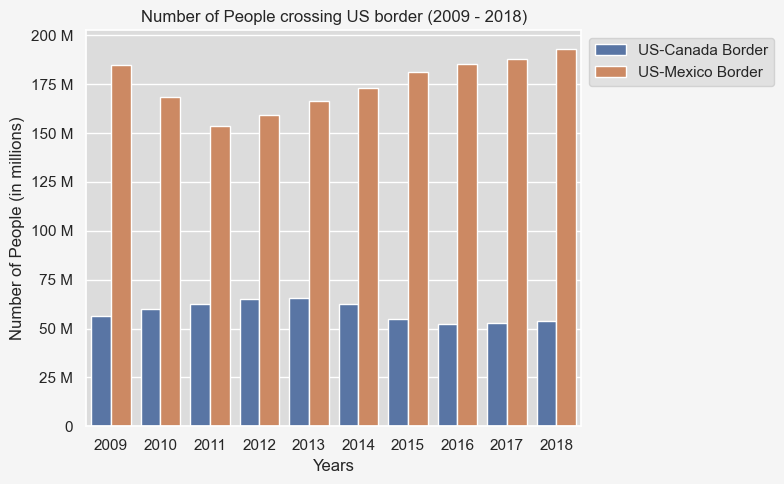

In [190]:
# Create a chart to compare number of People crossing US border between Canada and Mexico

# Get the data to plot the chart
Fig1 = sns.barplot(data=people_data, x="Year", y="Value", hue="Border", palette=color_theme)

# Format y-axis values to display values in a better format
Fig1.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig1.set_xlabel("Years")
Fig1.set_ylabel("Number of People (in millions)")
Fig1.set_title("Number of People crossing US border (2009 - 2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig1.png")

# Show the chart
plt.show()

In [191]:
# Groupby data for the columns needed for the chart
vehicle_data = vehicles_df.groupby(["Year", "Border"]).sum().reset_index()

# Display the data
vehicle_data.head()

,Year,Border,Month,Value,Longitude,Latitude
0,2009,US-Canada Border,54024,38375710,-812504.16,400532.64
1,2009,US-Mexico Border,15600,79685190,-258200.64,72790.08
2,2010,US-Canada Border,54648,41584265,-821836.32,405236.64
3,2010,US-Mexico Border,15600,74429402,-258200.64,72790.08
4,2011,US-Canada Border,53040,44365457,-802862.40,394174.08


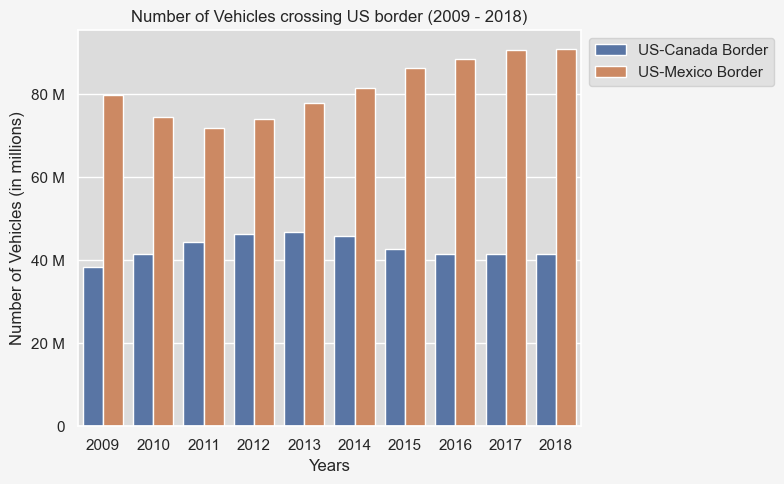

In [192]:
# Create a chart to compare number of Vehicles crossing US border between Canada and Mexico

# Get the data to plot the chart
Fig2 = sns.barplot(data=vehicle_data, x="Year", y="Value", hue="Border", palette=color_theme)

# Format y-axis values to display in a better format
Fig2.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig2.set_xlabel("Years")
Fig2.set_ylabel("Number of Vehicles (in millions)")
Fig2.set_title("Number of Vehicles crossing US border (2009 - 2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig2.png")

# Show the chart
plt.show()

_______________________________________________________________________________________________________________

## Question 2:  Which are the top 5 busiest Ports between US-Canada and US-Mexico?

## Top 5 Busiest Ports - People traffic

In [193]:
# Calculate the average number of People crossing each Port over 10 years

# Groupby 'Years' and 'Port Name' data
people_data_average = people_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()

# Groupby 'Port Name' again and take average of 'Values' by dividing by number of years in the data
people_data_average = people_data_average.groupby(["Port Name", "Border"])["Value"].sum()/len(people_data_average["Year"].unique())

# Convert to dataframe, sort values and reset index
people_data_average = pd.DataFrame(people_data_average).sort_values("Value", ascending=False).reset_index()

# Display the data
people_data_average.head()

,Port Name,Border,Value
0,San Ysidro,US-Mexico Border,30956733.7
1,El Paso,US-Mexico Border,25945313.1
2,Laredo,US-Mexico Border,14764553.0
3,Otay Mesa,US-Mexico Border,13916334.0
4,Buffalo-Niagara Falls,US-Canada Border,12494713.9


### Busiest Ports on US-Canada border - Poeple traffic

In [194]:
# Filter the data for people traffic to retrieve only US-Canada border details
people_canada_df = people_data_average.loc[people_data_average["Border"] == "US-Canada Border"].reset_index(drop=True)

# Display the data
people_canada_df.head()

,Port Name,Border,Value
0,Buffalo-Niagara Falls,US-Canada Border,12494713.9
1,Blaine,US-Canada Border,8537955.4
2,Detroit,US-Canada Border,7300574.8
3,Port Huron,US-Canada Border,3549121.6
4,Champlain-Rouses Point,US-Canada Border,2768509.2


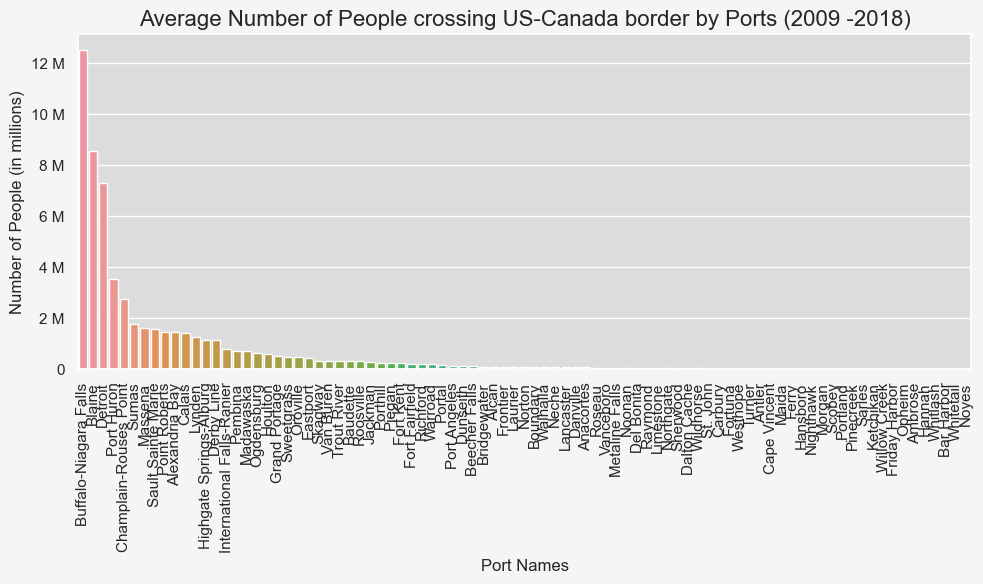

In [513]:
# Create a chart to compare average People traffic on US-Canada border between different Ports

# Get the data to plot the chart
Fig3 = sns.barplot(data=people_canada_df, x="Port Name", y="Value")

# Format y-axis values to display in a better format
Fig3.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig3.set_xlabel("Port Names", fontdict={'fontsize':12})
Fig3.set_ylabel("Number of People (in millions)", fontdict={'fontsize':12})
Fig3.set_title("Average Number of People crossing US-Canada border by Ports (2009 -2018)", fontdict={'fontsize':16})

# Set parameters and xticks
plt.rcParams['figure.figsize']=10,6
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig3.png")

# Show the chart
plt.show()

In [196]:
# Get the data for top 5 Ports between US-Canada border based on People traffic
top5_ports_canada_people = people_canada_df.nlargest(5, "Value").reset_index(drop=True)

# Put the top 5 Port Names in a list
top5_portnames_canada_people = top5_ports_canada_people["Port Name"]

# Retrieve and filter data for people traffic for US-Canda border only
people_canada_data = people_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()
people_canada_data = people_canada_data.loc[people_canada_data["Border"] == "US-Canada Border"]

# Create an empty list to store data
top5_ports_canada_people_data = []

# Loop through filtered data for top 5 Ports:
for index, row in people_canada_data.iterrows():

    # Loop through the list of top 5 Port Names
    for port in top5_portnames_canada_people:

        # Append the data for only top 5 Port Names
        if row["Port Name"] == port:
            top5_ports_canada_people_data.append(row)

# Convert the list to dataset
top5_ports_canada_people_data = pd.DataFrame(top5_ports_canada_people_data).reset_index(drop=True)

# Display the data
top5_ports_canada_people_data.head()

,Year,Border,Port Name,Value
0,2009,US-Canada Border,Blaine,6334460
1,2009,US-Canada Border,Buffalo-Niagara Falls,12974149
2,2009,US-Canada Border,Champlain-Rouses Point,2519258
3,2009,US-Canada Border,Detroit,7587617
4,2009,US-Canada Border,Port Huron,3394708


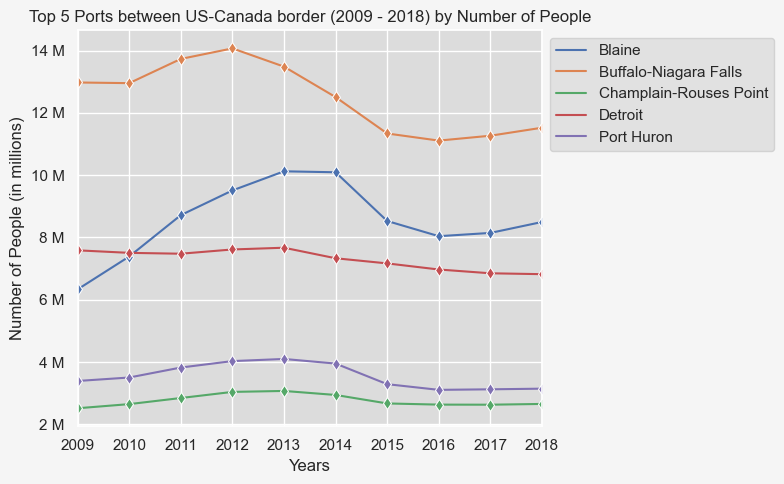

In [515]:
# Create a chart to see People traffic on top 5 Ports between US and Canada over 10 years

# Get the data to plot the chart
Fig4 = sns.lineplot(data=top5_ports_canada_people_data, x="Year", y="Value", hue="Port Name", marker='d')

# Format y-axis values to display in a better format
Fig4.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig4.set_xlabel("Years")
Fig4.set_ylabel("Number of People (in millions)")
Fig4.set_title("Top 5 Ports between US-Canada border (2009 - 2018) by Number of People")

# Set parameters and xticks
Fig4.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig4.png")

# Show the chart
plt.show()

### Busiest Ports on US-Mexico border - Poeple traffic

In [198]:
# Filter the data for People traffic to retrieve only US-Mexico border details
people_mexico_df = people_data_average.loc[people_data_average["Border"] == "US-Mexico Border"].reset_index(drop=True)

# Display the data
people_mexico_df.head()

,Port Name,Border,Value
0,San Ysidro,US-Mexico Border,30956733.7
1,El Paso,US-Mexico Border,25945313.1
2,Laredo,US-Mexico Border,14764553.0
3,Otay Mesa,US-Mexico Border,13916334.0
4,Hidalgo,US-Mexico Border,12253841.9


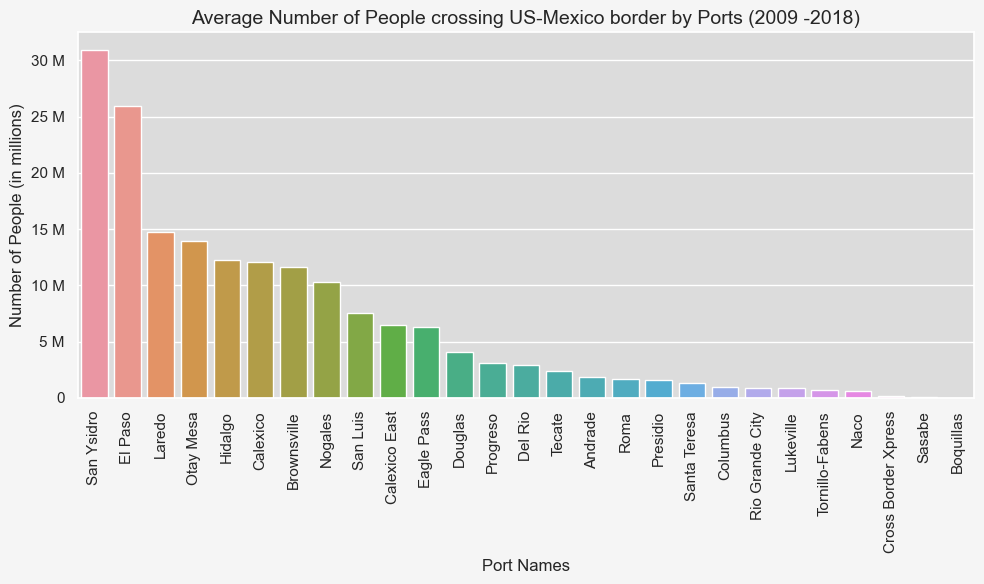

In [523]:
# Create a chart to compare average People traffic on US-Mexico border between different Ports

# Get the data to plot the chart
Fig5 = sns.barplot(data=people_mexico_df, x="Port Name", y="Value")

# Format y-axis values to display in a better format
Fig5.yaxis.set_major_formatter(ticker.EngFormatter())

# Fig3.bar_label(Fig3.containers[0])

# Set chart title and axis labels
Fig5.set_xlabel("Port Names", fontdict={'fontsize':12})
Fig5.set_ylabel("Number of People (in millions)", fontdict={'fontsize':12})
Fig5.set_title("Average Number of People crossing US-Mexico border by Ports (2009 -2018)", fontdict={'fontsize':14})

# Set parameters and xticks
plt.rcParams['figure.figsize']=10,6
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig5.png")

# Show the chart
plt.show()

In [200]:
# Get the data for top 5 Ports between US-Mexico border based on People traffic
top5_ports_mexico_people = people_mexico_df.nlargest(5, "Value").reset_index(drop=True)

# Put the top 5 Port Names in a list
top5_portnames_mexico_people = top5_ports_mexico_people["Port Name"]

# Retrieve and filter data for people traffic for US-Mexico border only
people_mexico_data = people_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()
people_mexico_data = people_mexico_data.loc[people_mexico_data["Border"] == "US-Mexico Border"]

# Create an empty list to store data
top5_ports_mexico_people_data = []

# Loop through filtered data for top 5 Ports:
for index, row in people_mexico_data.iterrows():

    # Loop through the list of top 5 Port Names
    for port in top5_portnames_mexico_people:

        # Append the data for only top 5 Port Names
        if row["Port Name"] == port:
            top5_ports_mexico_people_data.append(row)

# Convert the list to dataset
top5_ports_mexico_people_data = pd.DataFrame(top5_ports_mexico_people_data).reset_index(drop=True)

# Display the data
top5_ports_mexico_people_data.head()

,Year,Border,Port Name,Value
0,2009,US-Mexico Border,El Paso,26326668
1,2009,US-Mexico Border,Hidalgo,14631706
2,2009,US-Mexico Border,Laredo,17665030
3,2009,US-Mexico Border,Otay Mesa,10213341
4,2009,US-Mexico Border,San Ysidro,30576138


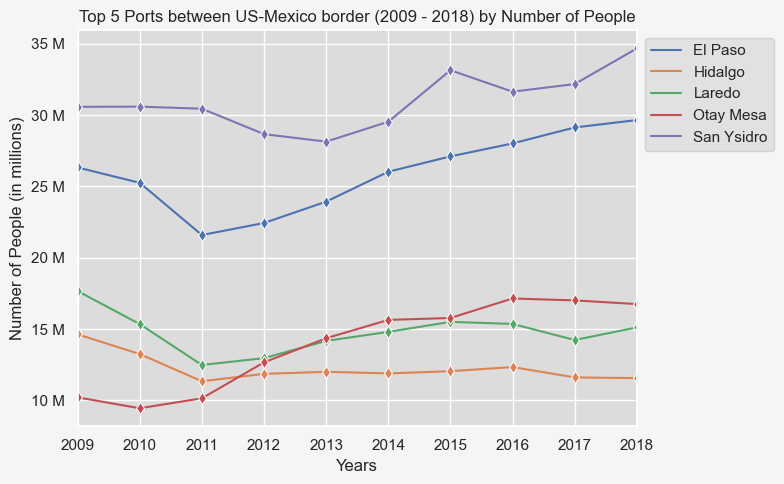

In [525]:
# Create a chart to see People traffic on top 5 Ports between US and Mexico over 10 years

# Get the data to plot the chart
Fig6 = sns.lineplot(data=top5_ports_mexico_people_data, x="Year", y="Value", hue="Port Name", marker='d')

# Format y-axis values to display in a better format
Fig6.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig6.set_xlabel("Years")
Fig6.set_ylabel("Number of People (in millions)")
Fig6.set_title("Top 5 Ports between US-Mexico border (2009 - 2018) by Number of People")

# Set parameters and xticks
Fig6.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig6.png")

# Show the chart
plt.show()

## Top 5 Busiest Ports - Vehicle traffic

In [202]:
# Calculate the average number of Vehicles crossing each Port over 10 years

# Groupby 'Years' and 'Port Name' data
vehicle_data_average = vehicles_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()

# Groupby 'Port Name' again and take average of 'Values' by dividing by number of years in the data
vehicle_data_average = vehicle_data_average.groupby(["Port Name", "Border"])["Value"].sum()/len(vehicle_data_average["Year"].unique())

# Convert to dataframe, sort values and reset index
vehicle_data_average = pd.DataFrame(vehicle_data_average).sort_values("Value", ascending=False).reset_index()

# Display the data
vehicle_data_average.head()

,Port Name,Border,Value
0,San Ysidro,US-Mexico Border,13081456.8
1,El Paso,US-Mexico Border,12715631.1
2,Laredo,US-Mexico Border,9206475.4
3,Otay Mesa,US-Mexico Border,7807289.6
4,Buffalo-Niagara Falls,US-Canada Border,7333610.7


### Busiest Ports on US-Canada border - Vehicle traffic

In [203]:
# Filter the data for Vehicle traffic to retrieve only US-Canada border details
vehicle_canada_df = vehicle_data_average.loc[vehicle_data_average["Border"] == "US-Canada Border"].reset_index(drop=True)

# Display the data
vehicle_canada_df.head()

,Port Name,Border,Value
0,Buffalo-Niagara Falls,US-Canada Border,7333610.7
1,Detroit,US-Canada Border,7296560.3
2,Blaine,US-Canada Border,4983645.3
3,Port Huron,US-Canada Border,3641960.9
4,Champlain-Rouses Point,US-Canada Border,1727803.3


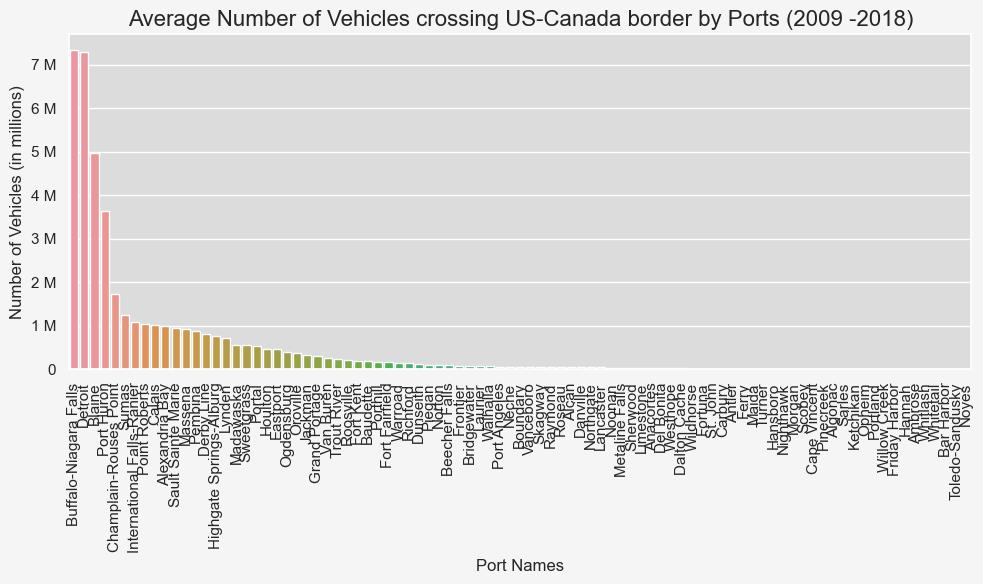

In [518]:
# Create a chart to compare average Vehicle traffic on US-Canada border between different Ports

# Get the data to plot the chart
Fig7 = sns.barplot(data=vehicle_canada_df, x="Port Name", y="Value")

# Format y-axis values to display in a better format
Fig7.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig7.set_xlabel("Port Names", fontdict={'fontsize':12})
Fig7.set_ylabel("Number of Vehicles (in millions)", fontdict={'fontsize':12})
Fig7.set_title("Average Number of Vehicles crossing US-Canada border by Ports (2009 -2018)", fontdict={'fontsize':16})

# Set parameters and xticks
plt.rcParams['figure.figsize']=10,6
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig7.png")

# Show the chart
plt.show()

In [205]:
# Get the data for top 5 Ports between US-Canada border based on Vehicle traffic
top5_ports_canada_vehicle = vehicle_canada_df.nlargest(5, "Value").reset_index(drop=True)

# Put the top 5 Port Names in a list
top5_portnames_canada_vehicle = top5_ports_canada_vehicle["Port Name"]

# Retrieve and filter data for vehicle traffic for US-Canda border only
vehicle_canada_data = vehicles_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()
vehicle_canada_data = vehicle_canada_data.loc[vehicle_canada_data["Border"] == "US-Canada Border"]

# Create an empty list to store data
top5_ports_canada_vehicle_data = []

# Loop through filtered data for top 5 Ports:
for index, row in vehicle_canada_data.iterrows():

    # Loop through the list of top 5 Port Names
    for port in top5_portnames_canada_vehicle:

        # Append the data for only top 5 Port Names
        if row["Port Name"] == port:
            top5_ports_canada_vehicle_data.append(row)

# Convert the list to dataste
top5_ports_canada_vehicle_data = pd.DataFrame(top5_ports_canada_vehicle_data).reset_index(drop=True)

# Display the data
top5_ports_canada_vehicle_data.head()

,Year,Border,Port Name,Value
0,2009,US-Canada Border,Blaine,3568534
1,2009,US-Canada Border,Buffalo-Niagara Falls,7114961
2,2009,US-Canada Border,Champlain-Rouses Point,1688245
3,2009,US-Canada Border,Detroit,6621018
4,2009,US-Canada Border,Port Huron,3194401


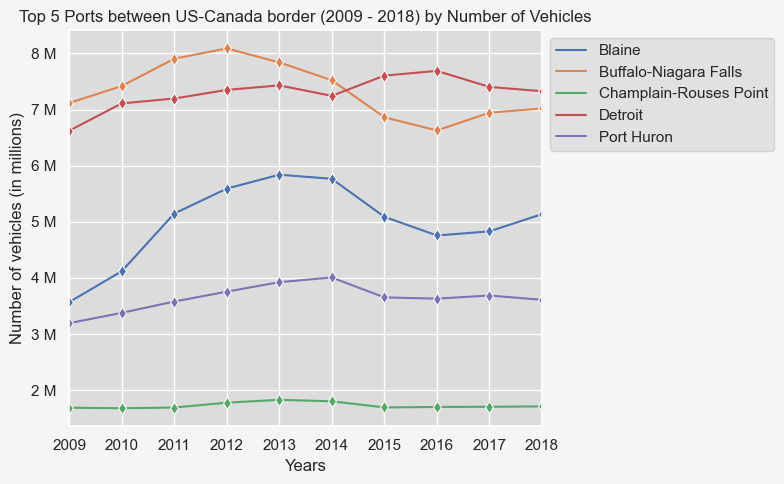

In [520]:
# Create a chart to see Vehicle traffic on top 5 Ports between US and Canada over 10 years

# Get the data to plot the chart
Fig8 = sns.lineplot(data=top5_ports_canada_vehicle_data, x="Year", y="Value", hue="Port Name", marker='d')

# Format y-axis values to display in a better format
Fig8.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig8.set_xlabel("Years")
Fig8.set_ylabel("Number of vehicles (in millions)")
Fig8.set_title("Top 5 Ports between US-Canada border (2009 - 2018) by Number of Vehicles")

# Set parameters and xticks
Fig8.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig8.png")

# Show the chart
plt.show()

### Busiest Ports on US-Mexico border - Vehicle traffic

In [207]:
# Filter the data for Vehicle traffic to retrieve only US-Mexico border details
vehicle_mexico_df = vehicle_data_average.loc[vehicle_data_average["Border"] == "US-Mexico Border"].reset_index(drop=True)

# Display the data
vehicle_mexico_df.head()

,Port Name,Border,Value
0,San Ysidro,US-Mexico Border,13081456.8
1,El Paso,US-Mexico Border,12715631.1
2,Laredo,US-Mexico Border,9206475.4
3,Otay Mesa,US-Mexico Border,7807289.6
4,Hidalgo,US-Mexico Border,5977097.9


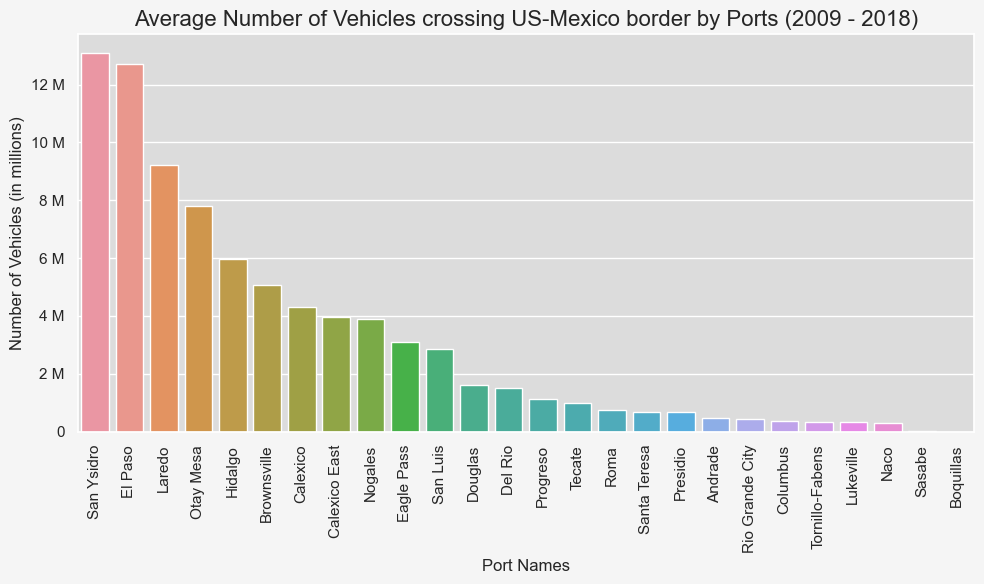

In [522]:
# Create a chart to compare average Vehicle traffic on US-Mexico border between different Ports

# Get the data to plot the chart
Fig9 = sns.barplot(data=vehicle_mexico_df, x="Port Name", y="Value")

# Format y-axis values to display in a reasonable format
Fig9.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig9.set_xlabel("Port Names", fontdict={'fontsize':12})
Fig9.set_ylabel("Number of Vehicles (in millions)", fontdict={'fontsize':12})
Fig9.set_title("Average Number of Vehicles crossing US-Mexico border by Ports (2009 - 2018)", fontdict={'fontsize':16})

# Set parametes and xticks
plt.rcParams['figure.figsize']=10,6
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig9.png")

# Show the chart
plt.show()

In [209]:
# Get the data for top 5 Ports between US-Mexico border based on Vehicle traffic
top5_ports_mexico_vehicle = vehicle_mexico_df.nlargest(5, "Value").reset_index(drop=True)

# Put the top 5 Port Names in a list
top5_portnames_mexico_vehicle = top5_ports_mexico_vehicle["Port Name"]

# Retrieve and filter data for vehicle traffic for US-Mexico border only
vehicle_mexico_data = vehicles_df.groupby(["Year", "Border", "Port Name"])["Value"].sum().reset_index()
vehicle_mexico_data = vehicle_mexico_data.loc[vehicle_mexico_data["Border"] == "US-Mexico Border"]

# Create an empty list to store data
top5_ports_mexico_vehicle_data = []

# Loop through filtered data for top 5 Ports:
for index, row in vehicle_mexico_data.iterrows():

    # Loop through the list of top 5 Port Names
    for port in top5_portnames_mexico_vehicle:

        # Append the data for only top 5 Port Names
        if row["Port Name"] == port:
            top5_ports_mexico_vehicle_data.append(row)

# Convert the list to dataste
top5_ports_mexico_vehicle_data = pd.DataFrame(top5_ports_mexico_vehicle_data).reset_index(drop=True)

# Display the data
top5_ports_mexico_vehicle_data.head()

,Year,Border,Port Name,Value
0,2009,US-Mexico Border,El Paso,11906982
1,2009,US-Mexico Border,Hidalgo,7046317
2,2009,US-Mexico Border,Laredo,8534038
3,2009,US-Mexico Border,Otay Mesa,5516018
4,2009,US-Mexico Border,San Ysidro,13427337


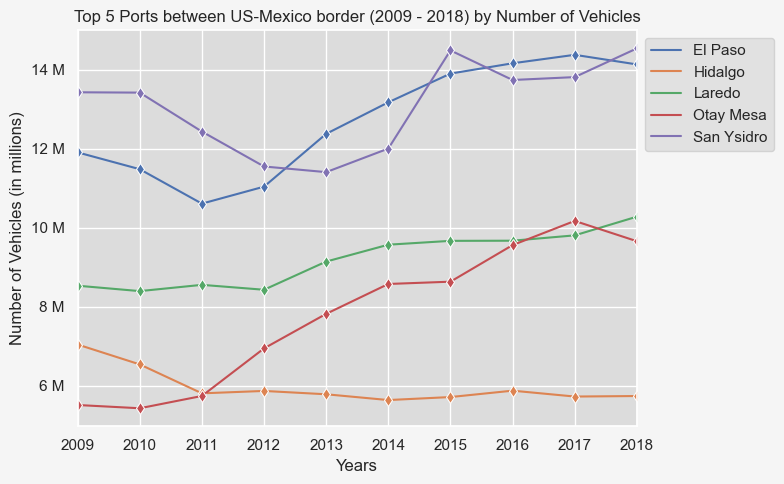

In [526]:
# Create a chart to see Vehicle traffic on top 5 Ports between US and Mexico over 10 years

# Get the data to plot the chart
Fig10 = sns.lineplot(data=top5_ports_mexico_vehicle_data, x="Year", y="Value", hue="Port Name", marker='d')

# Format y-axis values to display in a better format
Fig10.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig10.set_xlabel("Years")
Fig10.set_ylabel("Number of Vehicles (in millions)")
Fig10.set_title("Top 5 Ports between US-Mexico border (2009 - 2018) by Number of Vehicles")

# Set parametes and xticks
Fig10.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig10.png")

# Show the chart
plt.show()

_______________________________________________________________________________________________________________

## Question 3:  Which are the top 3 busiest States between US-Canada and US-Mexico?

## Top 3 Busiest States - People traffic

In [211]:
# Calculate the average number of People crossing each State over 10 years

# Groupby 'Years' and 'State' data
people_data_average_state = people_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()

# Groupby 'State' again and take average of 'Values' by dividing by number of years in the data
people_data_average_state = people_data_average_state.groupby(["State", "Border"])["Value"].sum()/len(people_data_average_state["Year"].unique())

# Convert to dataframe, sort values and reset index
people_data_average_state = pd.DataFrame(people_data_average_state).sort_values("Value", ascending=False).reset_index()

# Display the data
people_data_average_state.head()

,State,Border,Value
0,Texas,US-Mexico Border,81813523.1
1,California,US-Mexico Border,67762197.8
2,Arizona,US-Mexico Border,23418581.4
3,New York,US-Canada Border,19286848.7
4,Washington,US-Canada Border,14186034.7


### Busiest States on US-Canada border - Poeple traffic

In [212]:
# Filter the data for People traffic to retrieve only US-Canada border details
people_canada_state_df = people_data_average_state.loc[people_data_average_state["Border"] == "US-Canada Border"].reset_index(drop=True)

# Display the data
people_canada_state_df.head()

,State,Border,Value
0,New York,US-Canada Border,19286848.7
1,Washington,US-Canada Border,14186034.7
2,Michigan,US-Canada Border,12415064.7
3,Maine,US-Canada Border,4279652.2
4,Vermont,US-Canada Border,2720030.8


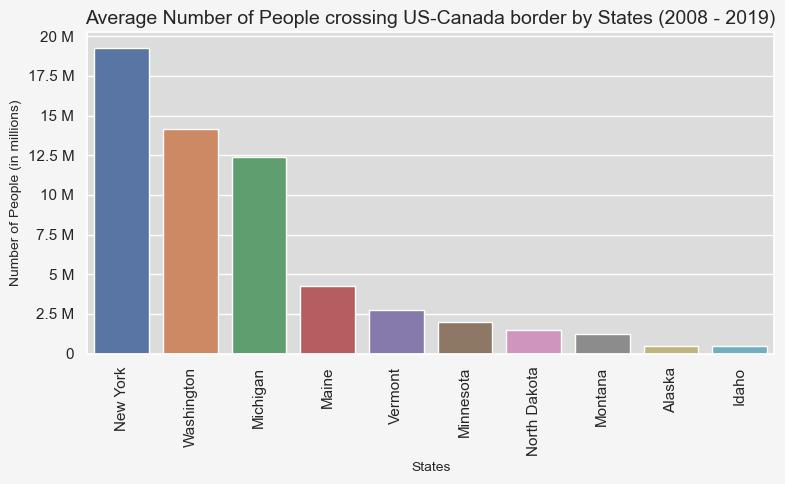

In [529]:
# Create a chart to compare average People traffic on US-Canada border between different States

# Get the data to plot the chart
Fig11 = sns.barplot(data=people_canada_state_df, x="State", y="Value")

# Format y-axis values to display in a better format
Fig11.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig11.set_xlabel("States", fontdict={'fontsize':10})
Fig11.set_ylabel("Number of People (in millions)", fontdict={'fontsize':10})
Fig11.set_title("Average Number of People crossing US-Canada border by States (2008 - 2019)", fontdict={'fontsize':14})

# Set parameters and xticks
plt.rcParams['figure.figsize']=8,5
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig11.png")

# Show the chart
plt.show()

In [214]:
# Get the data for top 3 States between US-Canada border based on People traffic
top3_states_canada_people = people_canada_state_df.nlargest(3, "Value").reset_index(drop=True)

# Put the top 3 State Names in a list
top3_statenames_canada_people = top3_states_canada_people["State"]

# Retrieve and filter data for people traffic for US-Canda border only
people_canada_state_data = people_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()
people_canada_state_data = people_canada_state_data.loc[people_canada_state_data["Border"] == "US-Canada Border"]

# Create an empty list to store data
top3_states_canada_people_data = []

# Loop through filtered data for top 3 States:
for index, row in people_canada_state_data.iterrows():

    # Loop through the list of top 3 States
    for state in top3_statenames_canada_people:

        # Append the data for only top 3 States
        if row["State"] == state:
            top3_states_canada_people_data.append(row)

# Convert the list to dataste
top3_states_canada_people_data = pd.DataFrame(top3_states_canada_people_data).reset_index(drop=True)

# Display the data
top3_states_canada_people_data.head()

,Year,Border,State,Value
0,2009,US-Canada Border,Michigan,12453911
1,2009,US-Canada Border,New York,19620922
2,2009,US-Canada Border,Washington,11561223
3,2010,US-Canada Border,Michigan,12644883
4,2010,US-Canada Border,New York,19759078


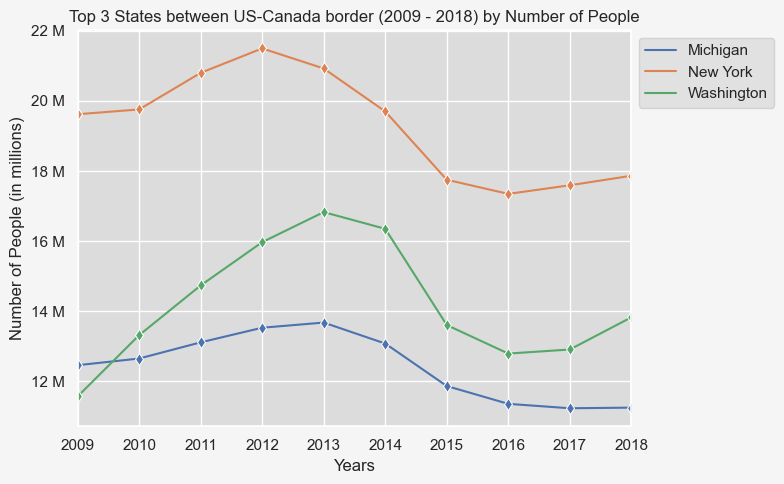

In [530]:
# Create a chart to see People traffic on top 3 States between US and Canada over 10 years

# Get the data to plot the chart
Fig12 = sns.lineplot(data=top3_states_canada_people_data, x="Year", y="Value", hue="State", marker='d')

# Format y-axis values to display in a better format
Fig12.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig12.set_xlabel("Years")
Fig12.set_ylabel("Number of People (in millions)")
Fig12.set_title("Top 3 States between US-Canada border (2009 - 2018) by Number of People")

# Set parameters and xticks
Fig12.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig12.png")

# Show the chart
plt.show()

### Busiest States on US-Mexico border - Poeple traffic

In [216]:
# Filter the data for People traffic to retrieve only US-Mexico border details
people_mexico_state_df = people_data_average_state.loc[people_data_average_state["Border"] == "US-Mexico Border"].reset_index(drop=True)

# Display the data
people_mexico_state_df.head()

,State,Border,Value
0,Texas,US-Mexico Border,81813523.1
1,California,US-Mexico Border,67762197.8
2,Arizona,US-Mexico Border,23418581.4
3,New Mexico,US-Mexico Border,2266536.2


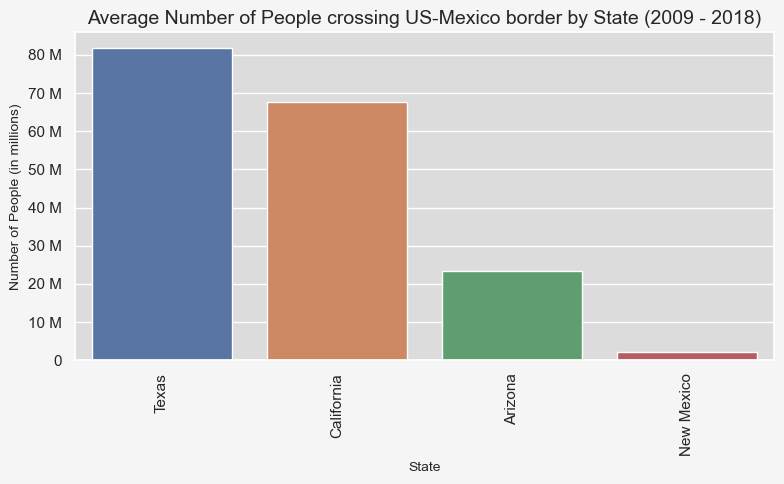

In [217]:
# Create a chart to compare average People traffic on US-Mexico border between different States

# Get the data to plot the chart
Fig13 = sns.barplot(data=people_mexico_state_df, x="State", y="Value")

# Format y-axis values to display in a better format
Fig13.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig13.set_xlabel("State", fontdict={'fontsize':10})
Fig13.set_ylabel("Number of People (in millions)", fontdict={'fontsize':10})
Fig13.set_title("Average Number of People crossing US-Mexico border by State (2009 - 2018)", fontdict={'fontsize':14})

# Set parameters and xticks
plt.rcParams['figure.figsize']=8,5
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig13.png")

# Show the chart
plt.show()

In [218]:
# Get the data for top 3 States between US-Mexico border based on People traffic
top3_states_mexico_people = people_mexico_state_df.nlargest(3, "Value").reset_index(drop=True)

# Put the top 3 States in a list
top3_statenames_mexico_people = top3_states_mexico_people["State"]

# Retrieve and filter data for people traffic for US-Mexico border only
people_mexico_state_data = people_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()
people_mexico_state_data = people_mexico_state_data.loc[people_mexico_state_data["Border"] == "US-Mexico Border"]

# Create an empty list to store data
top3_states_mexico_people_data = []

# Loop through filtered data for top 3 States:
for index, row in people_mexico_state_data.iterrows():

    # Loop through the list of top 3 States
    for state in top3_statenames_mexico_people:

        # Append the data for only top 3 States
        if row["State"] == state:
            top3_states_mexico_people_data.append(row)

# Convert the list to dataste
top3_states_mexico_people_data = pd.DataFrame(top3_states_mexico_people_data).reset_index(drop=True)

# Display the data
top3_states_mexico_people_data.head()

,Year,Border,State,Value
0,2009,US-Mexico Border,Arizona,25842603
1,2009,US-Mexico Border,California,63682359
2,2009,US-Mexico Border,Texas,92676707
3,2010,US-Mexico Border,Arizona,22561842
4,2010,US-Mexico Border,California,61106359


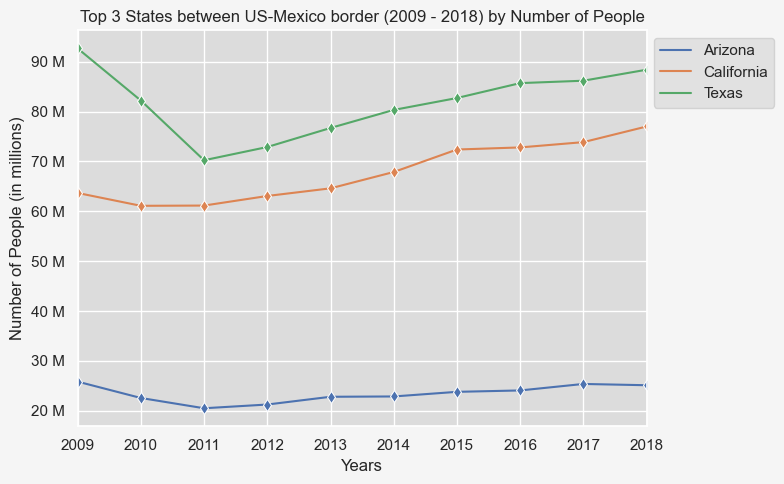

In [532]:
# Create a chart to see People traffic on top 3 States between US and Mexico over 10 years

# Get the data to plot the chart
Fig14 = sns.lineplot(data=top3_states_mexico_people_data, x="Year", y="Value", hue="State", marker='d')

# Format y-axis values to display in a better format
Fig14.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig14.set_xlabel("Years")
Fig14.set_ylabel("Number of People (in millions)")
Fig14.set_title("Top 3 States between US-Mexico border (2009 - 2018) by Number of People")

# Set parameters and xticks
Fig14.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig14.png")

# Show the chart
plt.show()

## Top 5 Busiest States - Vehicle traffic

In [220]:
# Calculate the average number of Vehicles crossing each state over 10 years

# Groupby 'Years' and 'State' data
vehicle_data_average_state = vehicles_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()

# Groupby 'State' again and take average of 'Values' by dividing by number of years in the data
vehicle_data_average_state = vehicle_data_average_state.groupby(["State", "Border"])["Value"].sum()/len(vehicle_data_average_state["Year"].unique())

# Convert to dataframe, sort values and reset index
vehicle_data_average_state = pd.DataFrame(vehicle_data_average_state).sort_values("Value", ascending=False).reset_index()

# Display the data
vehicle_data_average_state.head()

,State,Border,Value
0,Texas,US-Mexico Border,40914053.3
1,California,US-Mexico Border,30600747.5
2,Michigan,US-Canada Border,11907137.7
3,New York,US-Canada Border,11641221.8
4,Arizona,US-Mexico Border,8992310.4


### Busiest States on US-Canada border - Vehicle traffic

In [221]:
# Filter the data for Vehicle traffic to retrieve only US-Canada border details
vehicle_canada_state_df = vehicle_data_average_state.loc[vehicle_data_average_state["Border"] == "US-Canada Border"].reset_index(drop=True)

# Display the data
vehicle_canada_state_df.head()

,State,Border,Value
0,Michigan,US-Canada Border,11907137.7
1,New York,US-Canada Border,11641221.8
2,Washington,US-Canada Border,8815881.1
3,Maine,US-Canada Border,3353929.0
4,Vermont,US-Canada Border,1909397.0


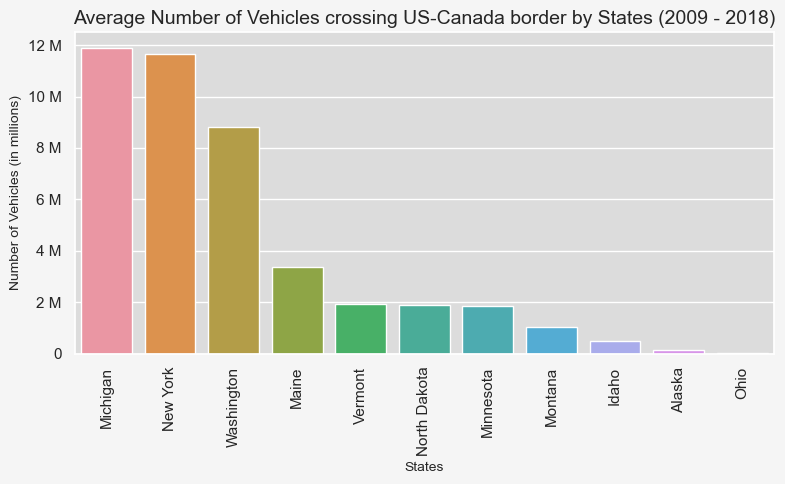

In [222]:
# Create a chart to compare average Vehicle traffic on US-Canada border between different States

# Get the data to plot the chart
Fig15 = sns.barplot(data=vehicle_canada_state_df, x="State", y="Value")

# Format y-axis values to display in a better format
Fig15.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig15.set_xlabel("States", fontdict={'fontsize':10})
Fig15.set_ylabel("Number of Vehicles (in millions)", fontdict={'fontsize':10})
Fig15.set_title("Average Number of Vehicles crossing US-Canada border by States (2009 - 2018)", fontdict={'fontsize':14})

# Set parameters and xticks
plt.rcParams['figure.figsize']=8,5
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig15.png")

# Show the chart
plt.show()

In [223]:
# Get the data for top 3 States between US-Canada border based on Vehicle traffic
top3_states_canada_vehicle = vehicle_canada_state_df.nlargest(3, "Value").reset_index(drop=True)

# Put the top 3 States in a list
top3_statenames_canada_vehicle = top3_states_canada_vehicle["State"]

# Retrieve and filter data for vehicle traffic for US-Canda border only
vehicle_canada_state_data = vehicles_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()
vehicle_canada_state_data = vehicle_canada_state_data.loc[vehicle_canada_state_data["Border"] == "US-Canada Border"]

# Create an empty list to store data
top3_states_canada_vehicle_data = []

# Loop through filtered data for top 3 States:
for index, row in vehicle_canada_state_data.iterrows():

    # Loop through the list of top 3 States
    for state in top3_statenames_canada_vehicle:

        # Append the data for only top 3 States
        if row["State"] == state:
            top3_states_canada_vehicle_data.append(row)

# Convert the list to dataste
top3_states_canada_vehicle_data = pd.DataFrame(top3_states_canada_vehicle_data).reset_index(drop=True)

# Display the data
top3_states_canada_vehicle_data.head()

,Year,Border,State,Value
0,2009,US-Canada Border,Michigan,10721378
1,2009,US-Canada Border,New York,11269622
2,2009,US-Canada Border,Washington,6661481
3,2010,US-Canada Border,Michigan,11471367
4,2010,US-Canada Border,New York,11727147


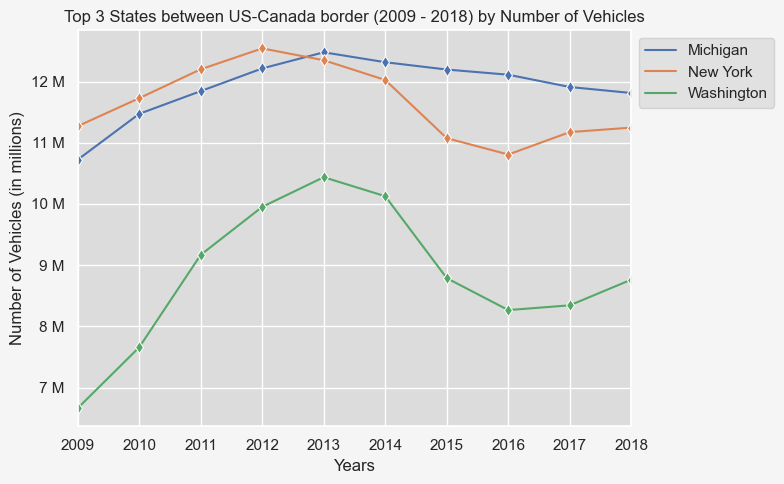

In [224]:
# Create a chart to see Vehicle traffic on top 3 States between US and Canada over 10 years

# Get the data to plot the chart
Fig16 = sns.lineplot(data=top3_states_canada_vehicle_data, x="Year", y="Value", hue="State", marker='d')

# Format y-axis values to display in a better format
Fig16.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig16.set_xlabel("Years")
Fig16.set_ylabel("Number of Vehicles (in millions)")
Fig16.set_title("Top 3 States between US-Canada border (2009 - 2018) by Number of Vehicles")

# Set parameters and xticks
Fig16.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig16.png")

# Show the chart
plt.show()

### Busiest States on US-Mexico border - Vehicle traffic

In [225]:
# Filter the data for Vehicle traffic to retrieve only US-Mexico border details
vehicle_mexico_state_df = vehicle_data_average_state.loc[vehicle_data_average_state["Border"] == "US-Mexico Border"].reset_index(drop=True)

# Display the data
vehicle_mexico_state_df.head()

,State,Border,Value
0,Texas,US-Mexico Border,40914053.3
1,California,US-Mexico Border,30600747.5
2,Arizona,US-Mexico Border,8992310.4
3,New Mexico,US-Mexico Border,1045893.9


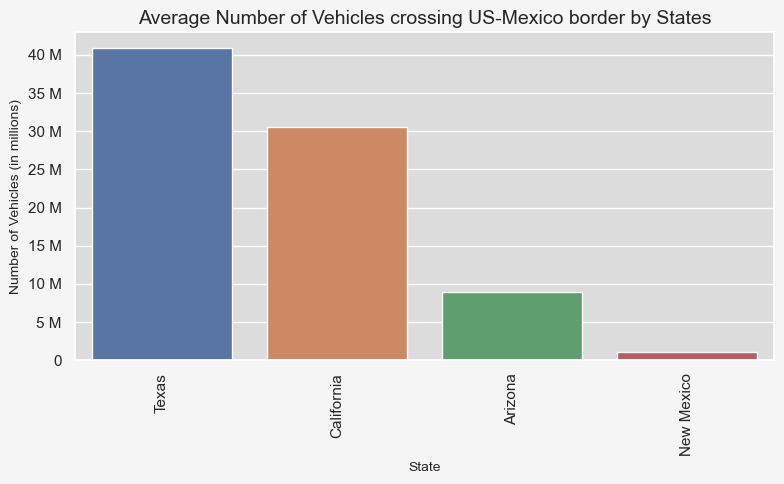

In [226]:
# Create a chart to compare average Vehicle traffic on US-Mexico border between different States

# Get the data to plot the chart
Fig17 = sns.barplot(data=vehicle_mexico_state_df, x="State", y="Value")

# Format y-axis values to display in a better format
Fig17.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig17.set_xlabel("State", fontdict={'fontsize':10})
Fig17.set_ylabel("Number of Vehicles (in millions)", fontdict={'fontsize':10})
Fig17.set_title("Average Number of Vehicles crossing US-Mexico border by States", fontdict={'fontsize':14})

# Set parameters and xticks
plt.rcParams['figure.figsize']=8,5
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig17.png")

# Show the chart
plt.show()

In [227]:
# Get the data for top 3 States between US-Mexico border based on Vehicle traffic
top3_states_mexico_vehicle = vehicle_mexico_state_df.nlargest(3, "Value").reset_index(drop=True)

# Put the top 3 States in a list
top3_statenames_mexico_vehicle = top3_states_mexico_vehicle["State"]

# Retrieve and filter data for vehicle traffic for US-Mexico border only
vehicle_mexico_state_data = vehicles_df.groupby(["Year", "Border", "State"])["Value"].sum().reset_index()
vehicle_mexico_state_data = vehicle_mexico_state_data.loc[vehicle_mexico_state_data["Border"] == "US-Mexico Border"]

# Create an empty list to store data
top3_states_mexico_vehicle_data = []

# Loop through filtered data for top 3 States:
for index, row in vehicle_mexico_state_data.iterrows():

    # Loop through the list of top 3 States
    for state in top3_statenames_mexico_vehicle:

        # Append the data for only top 3 States
        if row["State"] == state:
            top3_states_mexico_vehicle_data.append(row)

# Convert the list to dataste
top3_states_mexico_vehicle_data = pd.DataFrame(top3_states_mexico_vehicle_data).reset_index(drop=True)

# Display the data
top3_states_mexico_vehicle_data.head()

,Year,Border,State,Value
0,2009,US-Mexico Border,Arizona,8136455
1,2009,US-Mexico Border,California,28703144
2,2009,US-Mexico Border,Texas,41915509
3,2010,US-Mexico Border,Arizona,7466238
4,2010,US-Mexico Border,California,27554641


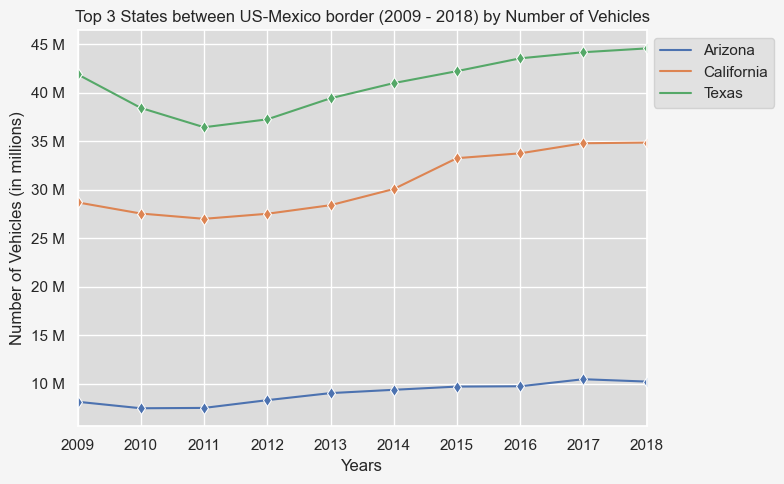

In [228]:
# Create a chart to see Vehicle traffic on top 3 states between US and Mexico over 10 years

# Get the data to plot the chart
Fig18 = sns.lineplot(data=top3_states_mexico_vehicle_data, x="Year", y="Value", hue="State", marker='d')

# Format y-axis values to display in a better format
Fig18.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig18.set_xlabel("Years")
Fig18.set_ylabel("Number of Vehicles (in millions)")
Fig18.set_title("Top 3 States between US-Mexico border (2009 - 2018) by Number of Vehicles")

# Set parameters and xticks
Fig18.set_xlim(2009, 2018)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig18.png")

# Show the chart
plt.show()

_______________________________________________________________________________________________________________

## Question 4: Which Vehicle types are used the most for US border crossing between 2009 t0 2018?

In [229]:
# Filter the Vehicles data for the columns needed for the chart
vehicle_types = vehicles_df.groupby(["Year","Border","Measure"])["Value"].sum().reset_index()

# Display the data
vehicle_types.head()

,Year,Border,Measure,Value
0,2009,US-Canada Border,Buses,116355
1,2009,US-Canada Border,Personal Vehicles,26706830
2,2009,US-Canada Border,Rail Containers Empty,530484
3,2009,US-Canada Border,Rail Containers Full,1022932
4,2009,US-Canada Border,Trains,24034


In [230]:
# Filter the vehicle types to data to retrieve only US-Canada border details
vehicle_types_canada = vehicle_types.loc[vehicle_types["Border"] == "US-Canada Border"]

# Convert the data to pivot table
vehicle_types_canada = vehicle_types_canada.pivot(index="Year", columns="Measure", values="Value")

# Display the pivot table
vehicle_types_canada

Measure,Buses,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,
2009,116355,26706830,530484,1022932,24034,1057138,3897304,5020633
2010,116064,28884267,593219,1209040,26123,1139716,4171431,5444405
2011,113932,31595769,638849,1287527,26667,1163422,4048916,5490375
2012,108021,33083636,715345,1431842,28524,1306899,4068774,5623507
2013,106152,33273388,751741,1534161,29347,1373365,4083251,5648658
2014,103748,31979736,780005,1574848,28643,1376618,4273823,5802209
2015,95833,28544860,726818,1610670,30969,1283452,4580887,5791021
2016,88234,27319904,634506,1565927,29486,1175217,4760317,5877938
2017,84182,26759167,772283,1715989,22475,1783210,4547644,5846593


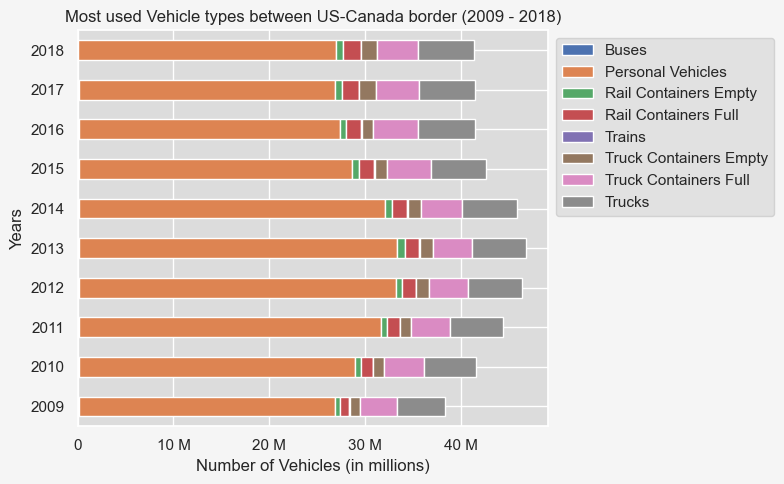

In [231]:
# Create a horizontal stacked bar chart showing US-Canada broder crossing by Vehicle type

# Get the data to plot the chart
Fig19 = vehicle_types_canada.plot.barh(stacked=True)

# Format x-axis values to display in a better format
Fig19.xaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig19.set_xlabel("Number of Vehicles (in millions)")
Fig19.set_ylabel("Years")
Fig19.set_title("Most used Vehicle types between US-Canada border (2009 - 2018)")

# Set parameters and xticks
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig19.png")

# Show the chart
plt.show()

In [232]:
# Filter the vehicle types to data to retrieve only US-Mexico border details
vehicle_types_mexico = vehicle_types.loc[vehicle_types["Border"] == "US-Mexico Border"]

# Convert the data to pivot table
vehicle_types_mexico = vehicle_types_mexico.pivot(index="Year", columns="Measure", values="Value")

# Display the pivot table
vehicle_types_canada

Measure,Buses,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,
2009,116355,26706830,530484,1022932,24034,1057138,3897304,5020633
2010,116064,28884267,593219,1209040,26123,1139716,4171431,5444405
2011,113932,31595769,638849,1287527,26667,1163422,4048916,5490375
2012,108021,33083636,715345,1431842,28524,1306899,4068774,5623507
2013,106152,33273388,751741,1534161,29347,1373365,4083251,5648658
2014,103748,31979736,780005,1574848,28643,1376618,4273823,5802209
2015,95833,28544860,726818,1610670,30969,1283452,4580887,5791021
2016,88234,27319904,634506,1565927,29486,1175217,4760317,5877938
2017,84182,26759167,772283,1715989,22475,1783210,4547644,5846593


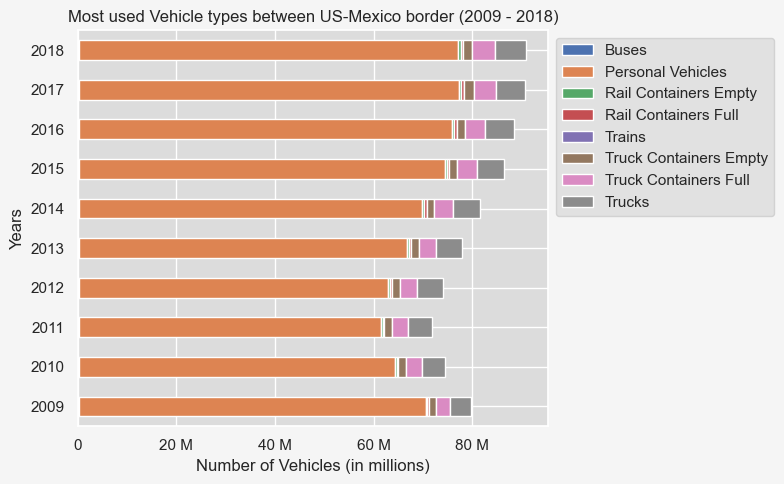

In [233]:
# Create a horizontal stacked bar chart showing US-Mexico broder crossing by Vehicle type

# Get the data to plot the chart
Fig20 = vehicle_types_mexico.plot.barh(stacked=True)

# Format x-axis values to display in a better format
Fig20.xaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig20.set_xlabel("Number of Vehicles (in millions)")
Fig20.set_ylabel("Years")
Fig20.set_title("Most used Vehicle types between US-Mexico border (2009 - 2018)")

# Set parameters and xticks
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig20.png")

# Show the chart
plt.show()

_______________________________________________________________________________________________________________

## Question 5: Which months are the busiest on US border?

In [234]:
# Groupby Months
months_data = final_df.groupby(["Year", "Month"])["Value"].sum().reset_index()

# Display the data
months_data.head()

,Year,Month,Value
0,2009,1,29168941
1,2009,2,26121160
2,2009,3,29745132
3,2009,4,29014657
4,2009,5,30443253


In [235]:
# Convert the data to pivot table
months_data = months_data.pivot(index="Year", columns="Month", values="Value")

# Display the pivot table
months_data

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2009,29168941,26121160,29745132,29014657,30443253,29477132,33026659,34385640,29281790,29470927,28701654,30614817
2010,27818306,25180937,28942089,28205243,29486662,28865816,31879303,32244987,27896075,28908116,26405942,28413060
2011,25792585,23291795,27323082,27139581,27979338,27776842,31341374,31062147,27249799,27762427,26615746,28891284
2012,26282324,25284549,28327890,27896125,28709070,28638076,31950998,32521463,28204271,28405263,28161561,30122326
2013,27067906,25226815,29639678,27875179,29716702,29980861,33364012,34512545,28848247,29722243,29060615,31203635
2014,27919628,25405308,29762106,29453362,30933491,30473419,33463937,34441194,29362227,30679098,29835312,31585034
2015,28580294,26024213,30199052,29417774,31423788,30989684,34134300,33588396,29584352,30549665,29525381,31203099
2016,28725205,26945918,30452835,29272861,31364781,30635189,34313546,33787557,30414466,31158564,29454332,30958929
2017,28826910,26081678,30687520,30833570,31496810,31116972,34848911,34444384,30681937,31614001,30397246,31941337


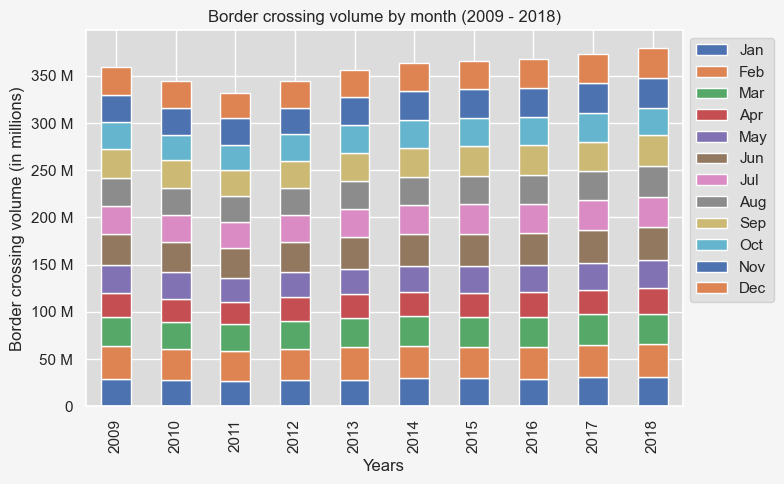

In [536]:
# Create a horizontal stacked bar chart showing US-Mexico broder crossing by Vehicle type

# Get the data to plot the chart
Fig21 = months_data.plot(kind="bar", stacked=True)

# Set the labels
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Format y-axis values to display in a better format
Fig21.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig21.set_xlabel("Years")
Fig21.set_ylabel("Border crossing volume (in millions)")
Fig21.set_title("Border crossing volume by month (2009 - 2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=labels)
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig21.png")

# Show the chart
plt.show()

In [237]:
# Calculate the average traffic per month over 10 years

# Groupby 'Months' data
months_df = final_df.groupby(["Month", "Year", "Border"])["Value"].sum().reset_index()

# Groupby 'Month' again and take average of 'Values' by dividing by number of years in the data
months_df = months_df.groupby(["Month", "Border"])["Value"].sum()/len(months_df["Year"].unique())

# Convert to dataframe, sort values and reset index
months_df = pd.DataFrame(months_df).reset_index()

# Display the data
months_df.head()

,Month,Border,Value
0,1,US-Canada Border,6605558.7
1,1,US-Mexico Border,21384271.9
2,2,US-Canada Border,6324235.4
3,2,US-Mexico Border,19372027.0
4,3,US-Canada Border,7695475.5


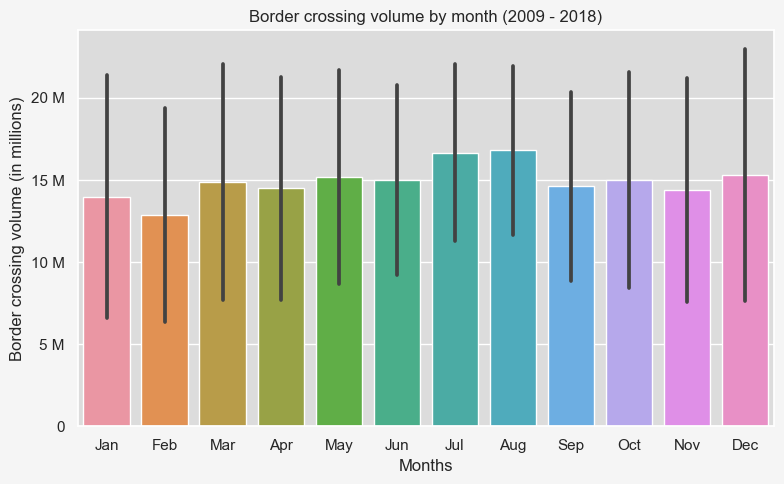

In [238]:
# Create a chart to compare average border crossing volume across months

# Get the data to plot the chart
Fig22 = sns.barplot(data=months_df, x="Month", y="Value", palette=color_theme)

# Format y-axis values to display in a better format
Fig22.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig22.set_xlabel("Months")
Fig22.set_ylabel("Border crossing volume (in millions)")
Fig22.set_title("Border crossing volume by month (2009 - 2018)")
Fig22.set_xticklabels(labels=labels)

# Set figure parameters
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig22.png")

# Show the chart
plt.show()

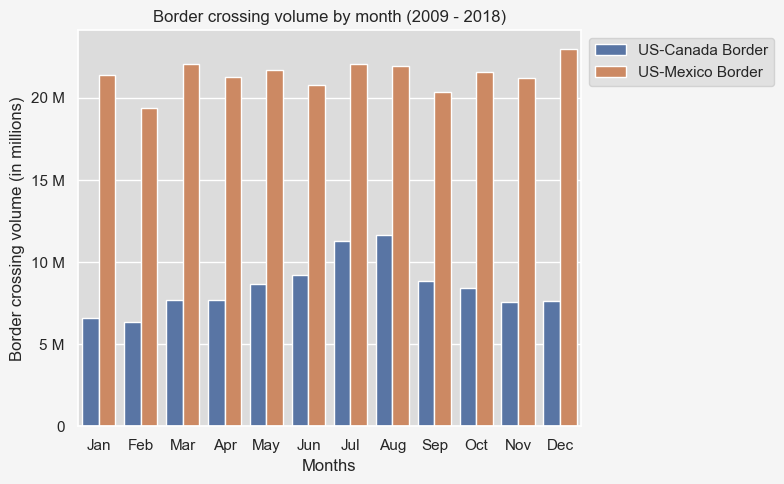

In [239]:
# Create a chart to compare average border crossing volume across months

# Get the data to plot the chart
Fig23 = sns.barplot(data=months_df, x="Month", y="Value", hue="Border", palette=color_theme)

# Format y-axis values to display in a better format
Fig23.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig23.set_xlabel("Months")
Fig23.set_ylabel("Border crossing volume (in millions)")
Fig23.set_title("Border crossing volume by month (2009 - 2018)")
Fig23.set_xticklabels(labels=labels)

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure
# plt.savefig("Images/Fig23.png")

# Show the chart
plt.show()

_______________________________________________________________________________________________________________

## Question 5:  How does the border crossing volume correlate between Mexico and Canada over the year?